In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
X = 2 * np.random.rand(100, 1)

In [3]:
y = -11*X + 4 + 7 * X**2 + np.random.randn(100, 1)

In [4]:
X = np.reshape(X, len(X))

In [5]:
y = np.reshape(y, len(y))

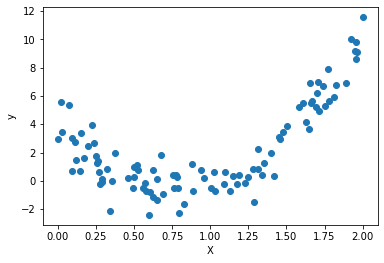

In [6]:
plt.scatter(X,y);
plt.xlabel('X');
plt.ylabel('y');

In [7]:
data = pd.Series(data=y, index=X)

In [8]:
data = pd.DataFrame(data)

In [9]:
data = data.reset_index()

In [10]:
data.columns = ['X', 'y']

In [11]:
data.head()

,X,y
0,1.699723,6.191295
1,0.601484,-2.407623
2,0.764900,-0.505721
3,1.187796,0.435535
4,1.225599,-0.123776


In [12]:
def initial_batch_gradient_descent(X:'Dataframe', rate=0.1, iterations=1000) -> 'list':
    """
    Calculates coordinates of theta vector (model’s parameter vector containing the bias 
    term and the feature weights) as a list for the first part of the sorted data by using 
    Batch Gradient Descent (GD) implementation. Returns a list of theta vector coordinates.
    ----------
    X : pandas Dataframe,
        Input dataset for which theta vector coordinates is calculated in form of a 
        pandas Dataframe data structure.
    rate: float number,
        A fixed learning rate.
    iterations: integer number,
        Number of iterations.
    """
    theta0 = [float(np.random.random(1)) for _ in range(len(X.columns))]
    m = len(X)
    for i in range(iterations):
        gradtheta0 = 2/m*(m*(theta0[0])) - 2/m*(sum(X[f'{X.columns[-1]}']))
        for j in range(len(X.columns)-1):
            gradtheta0 += 2/m*(sum(X[f'{X.columns[j]}']*theta0[j+1]))
        gradthetas = []
        
        for k in range(len(X.columns)-1):
            gradtheta = 2/m*(sum((theta0[0]*X[f'{X.columns[k]}']))) - 2/m*(sum((X[f'{X.columns[-1]}']*X[f'{X.columns[k]}'])))
            for j in range(len(X.columns)-1):
                gradtheta += 2/m*(sum(X[f'{X.columns[j]}']*theta0[j+1]*X[f'{X.columns[k]}']))
            gradthetas.append(gradtheta)
            
        theta0[0] = theta0[0] - rate*gradtheta0
        for i in range(len(gradthetas)):
            theta0[i+1] = theta0[i+1] - rate*gradthetas[i]
        
    return theta0        

In [13]:
def batch_gradient_2(old:'Dataframe', new:'Dataframe', theta0, iterations=1000, rate=0.1) -> 'list':
    """
    Calculates coordinates of theta vector (model’s parameter vector containing the bias 
    term and the feature weights) for each of the other parts of the sorted data (exlude the first part). 
    Using the data and theta vector's coordinates of the previous set of data the algorithm calculates the coordinates 
    of a parameter vector of the new data set. Returns a list of theta vector coordinates.
    ----------
    old : pandas Dataframe,
        The first set of the data set.
    new: pandas Dataframe,
        Input dataset for which theta vector coordinates is calculated in form of a 
        pandas Dataframe data structure.
    rate: float number,
        A fixed learning rate.
    iterations: integer number,
        Number of iterations.
    """
    theta1 = [float(np.random.random(1)) for _ in range(len(new.columns))]
    m = len(new)
    for i in range(500):
        gradthetas = []
        for k in range(len(new.columns)-1):
            gradtheta = 2/m*sum((theta0[0])*(new[f'{new.columns[k]}'] - old[f'{old.columns[k]}'].iloc[-1])) - 2/m*sum((new[f'{new.columns[-1]}'])*(new[f'{new.columns[k]}'] - old[f'{old.columns[k]}'].iloc[-1]))
            for j in range(len(new.columns)-1):
                gradtheta += 2/m*sum(theta1[j+1]*(new[f'{new.columns[j]}'] - old[f'{old.columns[j]}'].iloc[-1])*(new[f'{new.columns[k]}'] - old[f'{old.columns[k]}'].iloc[-1]))
                gradtheta += 2/m*sum(( old[f'{old.columns[j]}'].iloc[-1]*theta0[j+1])*(new[f'{new.columns[k]}'] - old[f'{old.columns[k]}'].iloc[-1]))
            gradthetas.append(gradtheta)

        for i in range(len(gradthetas)):
            theta1[i+1] = theta1[i+1] - rate*gradthetas[i]

        theta1[0] = theta0[0]
        for f in range(len(new.columns)-1):
            theta1[0] -= (old[f'{old.columns[f]}'].iloc[-1])*(theta1[f+1]-theta0[f+1])
    return theta1

In [14]:
def error_calculation(data_fr:'Dataframe', theta:'list')-> 'float':
    '''
    Returns the residual sum of squares.
    ----------
    data_fr : pandas Dataframe,
        The data set.
    theta: list,
        Model’s parameter vector.
    '''
    J = (sum((np.dot(data_fr.iloc[:,:-1].values, np.array(theta)) - data_fr.iloc[:, -1].values)**2))
    return J
     

In [15]:
def data_randomization(data:'Dataframe', n) -> 'list':
    '''
    Returns the list of random indexes that divide the sorted data set.
    ---------
    data : pandas Dataframe,
        The sorted data set.
    n: int,
        The number of indexes used to divide the sorted data. The number equals 
        the number of parts (intervals) that the sorted dataset must be divided minus one.
    '''
    t = []
    for i in range(n):
        number = random.randint(1, len(data)-1)
        if number in t:
            number += 1
        t.append(number)
            
    t.sort()
    return t

In [16]:
sorted_data = data.sort_values('X')

## Let k = 3 (divide our dataset into three intervals)

In [27]:
k = 3
error = 100_000_000
final_p = 0
iterat = 20

for i in range(iterat):
    l = []
    thetas = []
    p = data_randomization(sorted_data, k-1)
    l.append(sorted_data.iloc[:p[0],:])
    for j in range(k-2):
        l.append(sorted_data.iloc[p[j]:p[j+1],:])
    l.append(sorted_data.iloc[p[-1]:, :])
    
    
    thetas.append(initial_batch_gradient_descent(l[0]))
    for z in range(k-1):
        thetas.append(batch_gradient_2(l[z], l[z+1], thetas[z]))
        
    errors = []
    for g in range(k):
        l[g].insert(0,' ones', np.ones((len(l[g]))))
        errors.append(error_calculation(l[g], thetas[g]))
        
    J = sum(errors)/len(sorted_data)
    if J < error:
        error = J
        final_p = p
        final_thetas = thetas
        final_data = l

In [28]:
final_thetas

[[3.3197535831232723, -6.789629174841257],
 [-1.2738078895587397, 1.1867379564593845],
 [-14.582385043901388, 12.045571296679691]]

In [29]:
error

1.1403571387710258

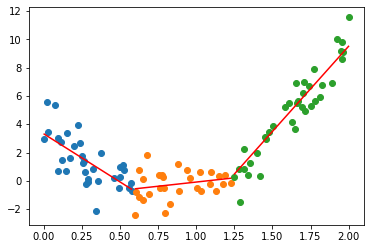

In [30]:
for d in range(k):
    plt.scatter(final_data[d].X, final_data[d].y)
    plt.plot(final_data[d].X, np.dot(final_data[d].iloc[:,:-1].values, final_thetas[d]), 'red')

## Let k = 5 (divide our dataset into five intervals)

In [31]:
k = 5
error = 100_000_000
final_p = 0
iterat = 20

for i in range(iterat):
    l = []
    thetas = []
    p = data_randomization(sorted_data, k-1)
    l.append(sorted_data.iloc[:p[0],:])
    for j in range(k-2):
        l.append(sorted_data.iloc[p[j]:p[j+1],:])
    l.append(sorted_data.iloc[p[-1]:, :])
    
    
    thetas.append(initial_batch_gradient_descent(l[0]))
    for z in range(k-1):
        thetas.append(batch_gradient_2(l[z], l[z+1], thetas[z]))
        
    errors = []
    for g in range(k):
        l[g].insert(0,' ones', np.ones((len(l[g]))))
        errors.append(error_calculation(l[g], thetas[g]))
        
    J = sum(errors)/len(sorted_data)
    if J < error:
        error = J
        final_p = p
        final_thetas = thetas
        final_data = l

In [32]:
final_thetas

[[3.682843041031229, -9.093597242605169],
 [2.3599009660515113, -4.546510232299814],
 [-1.469956658051963, 1.3635781297327774],
 [-3.3551914559656333, 2.901792939649443],
 [-18.868840007701674, 14.462141933227736]]

In [33]:
error

1.0922353128431

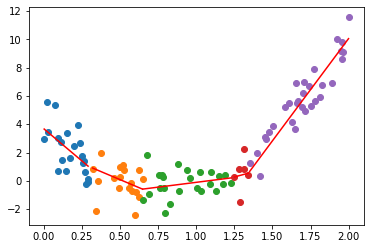

In [34]:
for d in range(k):
    plt.scatter(final_data[d].X, final_data[d].y)
    plt.plot(final_data[d].X, np.dot(final_data[d].iloc[:,:-1].values, final_thetas[d]), 'red')

## Let k = 7 (divide our dataset into seven intervals)

In [35]:
k = 7
error = 100_000_000
final_p = 0
iterat = 20

for i in range(iterat):
    l = []
    thetas = []
    p = data_randomization(sorted_data, k-1)
    l.append(sorted_data.iloc[:p[0],:])
    for j in range(k-2):
        l.append(sorted_data.iloc[p[j]:p[j+1],:])
    l.append(sorted_data.iloc[p[-1]:, :])
    
    
    thetas.append(initial_batch_gradient_descent(l[0]))
    for z in range(k-1):
        thetas.append(batch_gradient_2(l[z], l[z+1], thetas[z]))
        
    errors = []
    for g in range(k):
        l[g].insert(0,' ones', np.ones((len(l[g]))))
        errors.append(error_calculation(l[g], thetas[g]))
        
    J = sum(errors)/len(sorted_data)
    if J < error:
        error = J
        final_p = p
        final_thetas = thetas
        final_data = l

In [36]:
error

1.0913813591387125

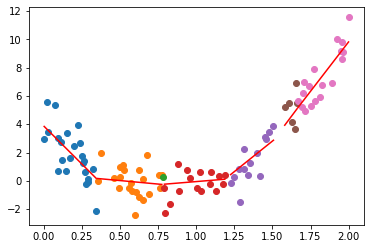

In [37]:
for d in range(k):
    plt.scatter(final_data[d].X, final_data[d].y)
    plt.plot(final_data[d].X, np.dot(final_data[d].iloc[:,:-1].values, final_thetas[d]), 'red')

(1.0, 1.2)

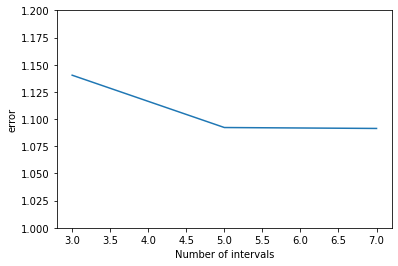

In [44]:
plt.plot([3, 5, 7], [1.1403571387710258, 1.0922353128431, 1.0913813591387125])
plt.ylabel('error')
plt.xlabel('Number of intervals')
plt.ylim(bottom=1, top=1.2)